<h1 style='text-align: center;'>Melanoma Detection</h1>

### Introduction:  
<div align="justify">This notebook contains the code to build a convolutional neural network (CNN) model to accurately detect melanoma, a deadly type of cancer, from skin images. The model is trained on a dataset containing images of various oncological diseases, including melanoma, acquired from the International Skin Imaging Collaboration (ISIC). The goal is to develop a robust classification model that can assist dermatologists to detect melanoma accurately. </div>

### Problem Statement:  
<div align="justify">
We have a dataset, which has 2357 images showing cancerous and non-cancerous skin diseases. These images were collected by the International Skin Imaging Collaboration (ISIC). All images were sorted according to the classification taken with ISIC, and all subsets were divided into the same number of images, with the exception of melanomas and moles, whose images are slightly dominant. 

The data set contains the following diseases:

- Actinic keratosis
- Basal cell carcinoma
- Dermatofibroma
- Melanoma
- Nevus
- Pigmented benign keratosis
- Seborrheic keratosis
- Squamous cell carcinoma
- Vascular lesion

We need to make a CNN based model which can accurately detect melanoma. A solution that can evaluate images and alert dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis. </div>

### Objectives:  
<div align="justify">The main objective is to build a multiclass classification model using a custom convolutional neural network in TensorFlow, that can assist dermatologists to detect melanoma accurately and efficiently. </div>


### Analysis Approach:    
<div align="justify">To tackle this problem effectively, I have established a structured data analysis approach. <br>

- Data Reading/Data Understanding:<br> It includes understanding, defining the path for train and test images and exploring the dataset to understand its structure and contents.

- Dataset Creation:<br>It includes splitting the train directory into training and validation sets with a batch size of 32 and resizing all images to 180x180 pixels to maintain uniformity.

- Dataset Visualization:<br>Visualizing instances of all nine classes present in the dataset to gain insights into the data.

- Model Building & Training:<br>It includes building a custom CNN model to detect the nine classes, rescaling images to normalize pixel, choosing an appropriate optimizer and loss function, training the model for 20 epochs, evaluating model performance and analyze for signs of overfitting or underfitting.

- Data Augmentation:<br>It includes Implementing a data augmentation strategy to address overfitting or underfitting issues.

- Model Building & Training on Augmented Data:<br>It includes rebuilding a CNN model, choosing an appropriate optimizer and loss function, training the model for 20 epochs, evaluating model performance and analyzing for signs of overfitting or underfitting.

- Class Distribution Analysis:<br>It includes examining the current class distribution in the training dataset, Identify the class with the least number of samples, determining which classes dominate the data in terms of proportionate number of samples. 

- Handling Class Imbalances:<br>It includes rectifying class imbalances present in the training dataset using the Augmentor library.

- Model Building & Training on Rectified Class Imbalance Data:<br>It includes rebuilding the CNN model with rectified class imbalance data, choosing the same optimizer and loss function for training, training the model for 30 epochs, evaluating if earlier issues have been resolved and summarizing the performance of the model. </div>

### Utilizing a python libraries for comprehensive analysis:


In [1]:
# Importing the essential python libraries for comprehensive analysis:
# Operating system library:
import os

# For dealing with file paths:
import pathlib

# For numerical computing:
import numpy as np

# For data manipulation:
import pandas as pd

# For image processing:
import PIL

# Plotting library:
import matplotlib.pyplot as plt

# Import TensorFlow library:
import tensorflow as tf

# For building neural network models:
from tensorflow.keras.models import Sequential  # Sequential model for stacking layers
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout, BatchNormalization, Activation  # Various layers for constructing the model architecture


# Callback for reducing learning rate on plateau:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# For image data preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Addressing warnings by suppressing them:
import warnings
warnings.filterwarnings('ignore')


### Data loading:

- The data has been downloaded and stored in a folder named 'Train' and 'Test' folders.


In [2]:
# To Define the path for train and test images:
# Path for the training dataset:
data_dir_train = pathlib.Path(r"Train")

# Path for the testing dataset:
data_dir_test = pathlib.Path(r'Test')

In [3]:
# To count the number of images in the training directory:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print("Number of images in the training directory:", image_count_train)

# To count the number of images in the testing directory:
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print("Number of images in the testing directory:", image_count_test)


Number of images in the training directory: 2239
Number of images in the testing directory: 118


#### Observations: There are 2239 images in the training directory and 118 images in the testing directory.

### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Creating a dataset:

Specifying a few basic parameters for the loader:


In [4]:
batch_size = 32
img_height = 180
img_width = 180

- We will Use 80% of the images for training, and 20% for validation.


In [5]:
# Creating a training dataset by loading images from a directory:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    # Directory containing training data:
    data_dir_train,
    # Splitting the data for validation (20%):
    validation_split=0.2,
    # Selecting the subset for training:
    subset="training",
    # Setting seed for reproducibility:
    seed=123,
    # Specifying the size of images:
    image_size=(img_height, img_width),
    # Specifying the batch size for training:
    batch_size=batch_size
)


Found 2239 files belonging to 9 classes.


Using 1792 files for training.


In [6]:
# Creating a validation dataset by loading images from a directory:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    # Directory containing training data:
    data_dir_train,
    # Splitting the data for validation (20%):
    validation_split=0.2,
    # Selecting the subset for validation:
    subset="validation",
    # Setting seed for reproducibility:
    seed=123,
    # Specifying the size of images:
    image_size=(img_height, img_width),
    # Specifying the batch size for validation:
    batch_size=batch_size
)


Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [7]:
# Retrieving the class names from the training dataset:
class_names = train_ds.class_names
# To print the class names:
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Data visualization:


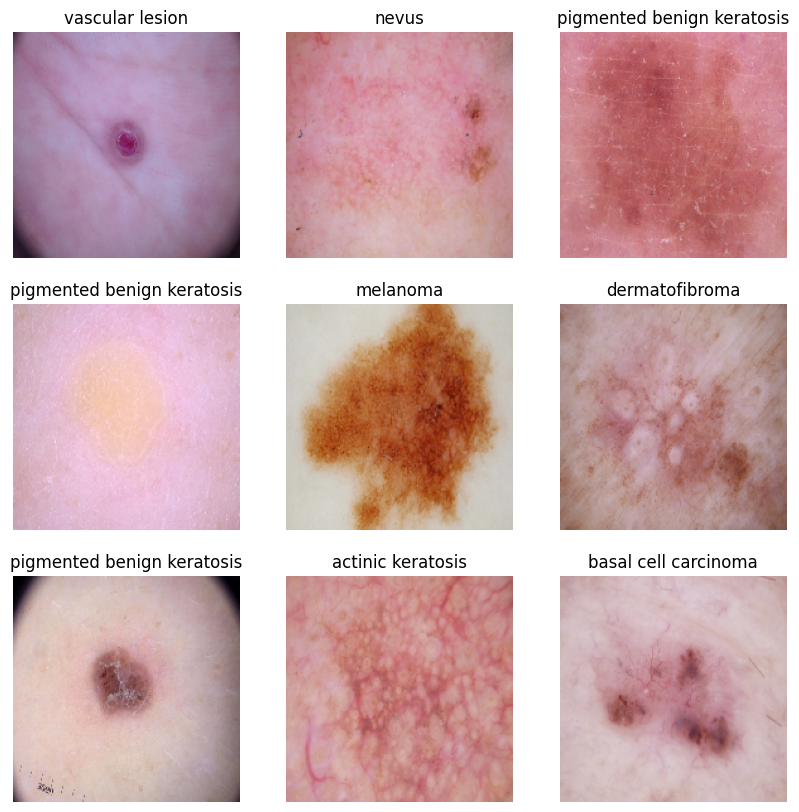

In [8]:
# To create a figure for plotting:
plt.figure(figsize=(10, 10))
# Iterating over the first batch of images and labels in the training dataset:
for images, labels in train_ds.take(1):
    # Plotting a grid of 3x3 images:
    for i in range(9):
        # Creating a subplot:
        ax = plt.subplot(3, 3, i + 1)
        # Displaying the image:
        plt.imshow(images[i].numpy().astype("uint8"))
        # Setting the title as the corresponding class name:
        plt.title(class_names[labels[i]])
        # Turning off axis labels:
        plt.axis("off")


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.


`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.


In [9]:
# Allowing TensorFlow to automatically tune performance parameters:
AUTOTUNE = tf.data.experimental.AUTOTUNE

# Caching, shuffling, and prefetching the training dataset:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

# Caching and prefetching the validation dataset:
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


### Model Creation:
- We will create a CNN model which can accurately detect 9 classes present in the dataset. We'll utilize layers.preprocessing.Rescaling to normalize pixel values between (0,1). Since RGB channel values are typically in the [0, 255] range, standardizing them to [0, 1] is crucial for optimal neural network performance.

In [10]:
# To define preprocessing layers:
preprocessing_layers = [
    # Rescaling pixel values to the range [0,1]:
    tf.keras.layers.Rescaling(1./255, input_shape=(180, 180, 3))
]

In [11]:
# To define input shape and other parameters:
input_shape = (180, 180, 3)
lr = 1e-5
init = 'normal'
activ = 'relu'

# To define the model architecture:
model = Sequential()

# Rescale pixel values to [0,1]:
model.add(tf.keras.layers.Rescaling(1./255, input_shape=(180, 180, 3)))

# Convolutional layers:
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))  
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

# Flatten the output for dense layers:
model.add(Flatten())

# Dense layers:
model.add(Dense(512, activation='relu')) 
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))  # Output layer with sigmoid activation:

# Print the model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 176, 176, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 88, 88, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 86, 86, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 86, 86, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 41, 41, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    26,214,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,318,689 (100.40 MB)

 Trainable params: 26,318,305 (100.40 MB)

 Non-trainable params: 384 (1.50 KB)

### Compiling the model:

- Selecting a suitable optimizer and loss function for training the model.


In [12]:
# To choose an appropriate optimizer and loss function:
# For optimizers, options include 'adam', 'sgd', 'rmsprop', etc. we will choose adam:
optimizer = 'adam'

# For loss functions, binary classification often uses 'binary_crossentropy':
loss_fn = "binary_crossentropy"

# Compile the model with chosen optimizer, loss function, and evaluation metric:
model.compile(optimizer=optimizer,
              loss=loss_fn,
              metrics=['accuracy'])


In [13]:
# Display a summary of the model architecture:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 176, 176, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 88, 88, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 86, 86, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 86, 86, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 41, 41, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    26,214,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,318,689 (100.40 MB)

 Trainable params: 26,318,305 (100.40 MB)

 Non-trainable params: 384 (1.50 KB)

### Model Training:


In [14]:
# To set the number of epochs and batch size for training:
epochs = 20
batch_size = 32

# Train the model using the training dataset and validate using the validation dataset:
# To store the training history for visualization and analysis:
history = model.fit(
  train_ds,
  batch_size=batch_size,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 49s 810ms/step - accuracy: 0.1742 - loss: -21166.5586 - val_accuracy: 0.1499 - val_loss: -69648.8906
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 43s 763ms/step - accuracy: 0.1657 - loss: -472916.7500 - val_accuracy: 0.1499 - val_loss: -679240.6875
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 44s 787ms/step - accuracy: 0.1748 - loss: -2094530.3750 - val_accuracy: 0.1499 - val_loss: -2429518.2500
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 43s 771ms/step - accuracy: 0.1816 - loss: -5707545.5000 - val_accuracy: 0.1499 - val_loss: -6467944.0000
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 43s 770ms/step - accuracy: 0.1818 - loss: -11625440.0000 - val_accuracy: 0.1499 - val_loss: -20995090.0000
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 42s 747ms/step - accuracy: 0.1805 - loss: -20997708.0000 - val_accuracy: 0.1499 - val_loss: -29579020.0000
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 43s 761ms/step - accuracy: 0.1800 - loss: -34502524.0000 - val_accuracy: 0.1499 - val_loss: -44376800.0000

### Training Results Visualization:


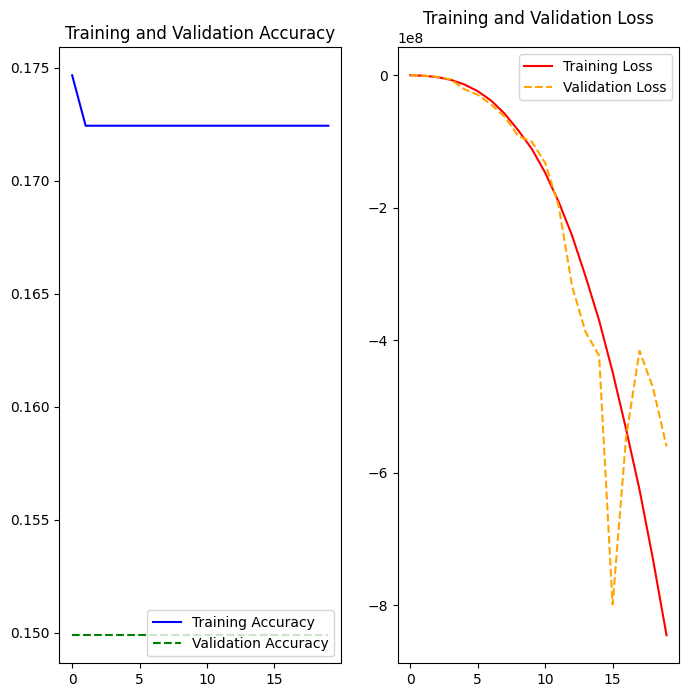

In [15]:
# Retrieve training and validation accuracy from training history:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Retrieve training and validation loss from training history:
loss = history.history['loss']
val_loss = history.history['val_loss']

# Define the range of epochs for plotting:
epochs_range = range(epochs)

# Plot training and validation accuracy:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', color='blue', linestyle='-')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', color='green', linestyle='--')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# Plot training and validation loss:
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', color='red', linestyle='-')
plt.plot(epochs_range, val_loss, label='Validation Loss', color='orange', linestyle='--')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# Show the plot:
plt.show()


#### Observations: 

- It shows overfitting. This occurs when the model memorizes the training data instead of learning generalizable patterns.
- Hence, we can conclude that the model is not performing well.

#### Model overfit or underfit?


In [16]:
# Evaluate the model on the training dataset and store the loss and accuracy:
loss, accuracy = model.evaluate(train_ds, verbose=1)

# Evaluate the model on the validation dataset and store the loss and accuracy:
loss_v, accuracy_v = model.evaluate(val_ds, verbose=1)

# Print the training accuracy and validation accuracy:
print("Accuracy: ", accuracy)
print("Validation Accuracy: ", accuracy_v)

# Print the training loss and validation loss:
print("Loss: ", loss)
print("Validation Loss", loss_v)

 1/56 ━━━━━━━━━━━━━━━━━━━━ 7s 135ms/step - accuracy: 0.1250 - loss: -585117504.0000

56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 119ms/step - accuracy: 0.1706 - loss: -562780416.0000
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step - accuracy: 0.1446 - loss: -555967936.0000
Accuracy:  0.1724330335855484
Validation Accuracy:  0.14988814294338226
Loss:  -551381248.0
Validation Loss -560447744.0


#### Observations: Hence, it's clear that the model is overfitting, and we need to choose the right data augmentation strategy.

In [17]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# To define image data generators with versatile transformations for augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,             # Centering each feature of the dataset's inputs to zero mean
    samplewise_center=False,              # Centering each sample's inputs to zero mean
    featurewise_std_normalization=False,  # Scaling inputs to unit standard deviation over the dataset
    samplewise_std_normalization=False,   # Scaling each input to unit standard deviation
    zca_whitening=False,     # Applying ZCA whitening transformation
    rotation_range=10,       # Randomly rotating images within a range of 10 degrees
    zoom_range=0.1,          # Randomly zooming into or out of images
    width_shift_range=0.1,   # Randomly shifting images horizontally within a fraction of total width
    height_shift_range=0.1,  # Randomly shifting images vertically within a fraction of total height
    horizontal_flip=False,   # Randomly flipping images horizontally
    vertical_flip=False      # Randomly flipping images vertically
)

# To specify the classes of images present in the dataset:
image_class = ['nevus', 'melanoma', 'basal_cell_caricoma', 'actinic_keratosis', 'vasc_lesion', 'dermatofibroma',
               'pigmented_keratosis', 'seborrheic_keratosis', 'squamous_carci']

# To create generators for training and validation datasets:
train_batches = datagen.flow_from_directory(data_dir_train,
                                             target_size=(180, 180),
                                             classes=image_class,
                                             batch_size=64
                                             )

valid_batches = datagen.flow_from_directory(data_dir_test,
                                             target_size=(180, 180),
                                             classes=image_class,
                                             batch_size=64
                                             )


Found 890 images belonging to 9 classes.
Found 48 images belonging to 9 classes.


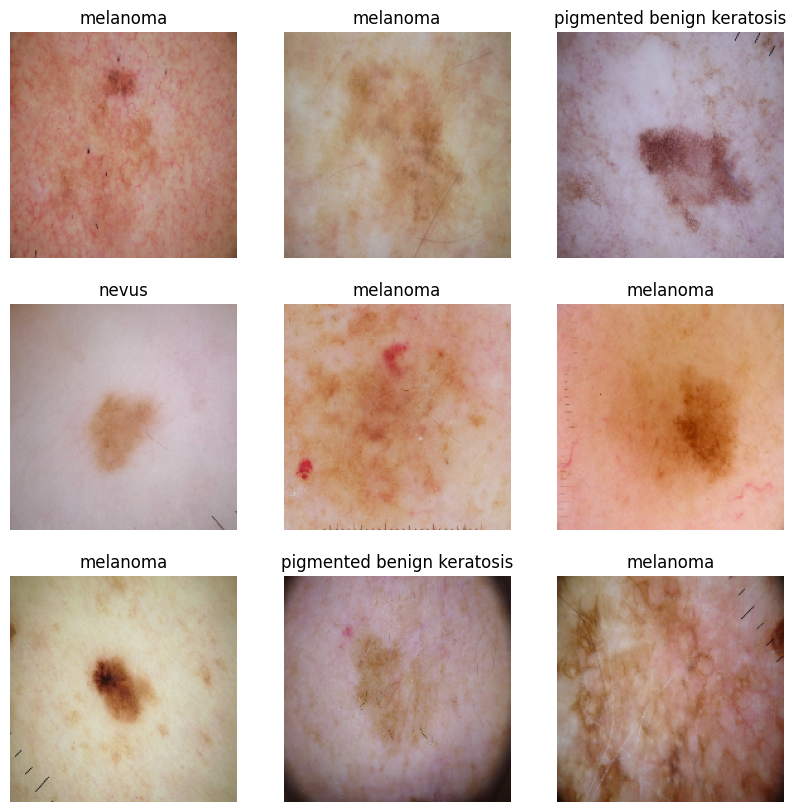

In [18]:
# To set the figure size:
plt.figure(figsize=(10, 10))

# Iterate over the first batch in the training dataset:
for images, labels in train_ds.take(1):
    # Iterate over each image in the batch:
    for i in range(9):
        # Create subplot for each image:
        ax = plt.subplot(3, 3, i + 1)
        
        # Display the image using matplotlib:
        plt.imshow(images[i].numpy().astype("uint8"))
        
        # Set title for the image using the class name corresponding to its label:
        plt.title(class_names[labels[i]])
        
        # Turn off axis:
        plt.axis("off")

# To display the plot:
plt.show()


### Create, compile, and train the model:


In [19]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

model = Sequential()

# Convolutional layers with ReLU activation and padding:
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))

# Max pooling layer:
model.add(MaxPooling2D(pool_size=(2, 2)))

# Dropout layer to prevent overfitting:
model.add(Dropout(0.25))

# Convolutional layers with ReLU activation and padding:
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))

# Max pooling layer:
model.add(MaxPooling2D(pool_size=(2, 2)))

# Dropout layer:
model.add(Dropout(0.4))

# Convolutional layer with ReLU activation:
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

# Max pooling layer:
model.add(MaxPooling2D(pool_size=(2, 2)))

# Dropout layer:
model.add(Dropout(0.4))

# Flatten layer to convert 2D feature maps into a 1D feature vector:
model.add(Flatten())

# Fully connected (Dense) layer with ReLU activation:
model.add(Dense(512, activation='relu'))

# Dropout layer:
model.add(Dropout(0.5))

# Output layer with softmax activation for multi-class classification:
model.add(Dense(9, activation='softmax'))

# Print model summary:
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 180, 180, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 180, 180, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 90, 90, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 90, 90, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 43, 43, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 21, 21, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 21, 21, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 56448)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    28,901,888 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 9)              │         4,617 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,045,929 (110.80 MB)

 Trainable params: 29,045,929 (110.80 MB)

 Non-trainable params: 0 (0.00 B)

### Compiling the model:


In [20]:
from keras.optimizers import Adam

# Initialize the Adam optimizer with specified parameters:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0, amsgrad=False)

# Compile the model with categorical cross-entropy loss and accuracy as metrics:
model.compile(loss='categorical_crossentropy',    # Categorical cross-entropy loss for multi-class classification
              optimizer=optimizer,                # Optimizer
              metrics=['accuracy'])               # Evaluation metric to monitor during training


- To speed up how quickly the optimizer reaches the best solution, we will adjust the learning rate using a annealing technique.

- The learning rate (LR) determines the size of the steps the optimizer takes through the landscape of the loss function. A higher LR means larger steps and faster convergence. However, a high LR can lead to poor sampling, increasing the risk of the optimizer getting stuck in a local minimum.

In [21]:
# Set up a learning rate annealer:
learning_rate_reduction = ReduceLROnPlateau(
    monitor='val_accuracy',   
    patience=3,               # Number of epochs with no improvement after which learning rate will be reduced
    verbose=1,                # Verbosity mode (0 or 1)
    factor=0.5,               # Factor by which the learning rate will be reduced (new_lr = lr * factor)
    min_lr=0.00001            # Lower bound on the learning rate
)

### Training the model:


In [22]:
# To set the number of epochs for training:
epochs = 20

# To define the batch size for training:
batch_size = 10

# Train the model using the fit method:
# `train_batches` is used as the training data:
# `epochs` specifies the number of epochs for training:
# `verbose` is set to 1 to display training progress:
# `validation_data` is set to `valid_batches` for validation during training:
# `callbacks` is set to include any desired callbacks, such as `learning_rate_reduction':
history = model.fit(train_batches,
                    epochs=epochs,
                    verbose=1,
                    validation_data=valid_batches,
                    callbacks=[learning_rate_reduction])


Epoch 1/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 28s 2s/step - accuracy: 0.2900 - loss: 193.9184 - val_accuracy: 0.2083 - val_loss: 1.7702 - learning_rate: 0.0010
Epoch 2/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.4265 - loss: 1.0857 - val_accuracy: 0.3333 - val_loss: 2.1493 - learning_rate: 0.0010
Epoch 3/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.4370 - loss: 1.0305 - val_accuracy: 0.3333 - val_loss: 2.1117 - learning_rate: 0.0010
Epoch 4/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.5143 - loss: 0.9523 - val_accuracy: 0.3333 - val_loss: 1.7900 - learning_rate: 0.0010
Epoch 5/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5161 - loss: 0.9398
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
14/14 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.5139 - loss: 0.9420 - val_accuracy: 0.3333 - val_loss: 1.5218 - learning_rate: 0.0010
Epoch 6/20
14/14 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.4952 - loss: 0.9680 - val_accuracy: 

### Visualizing the results:


<built-in method keys of dict object at 0x0000025516C917C0> :


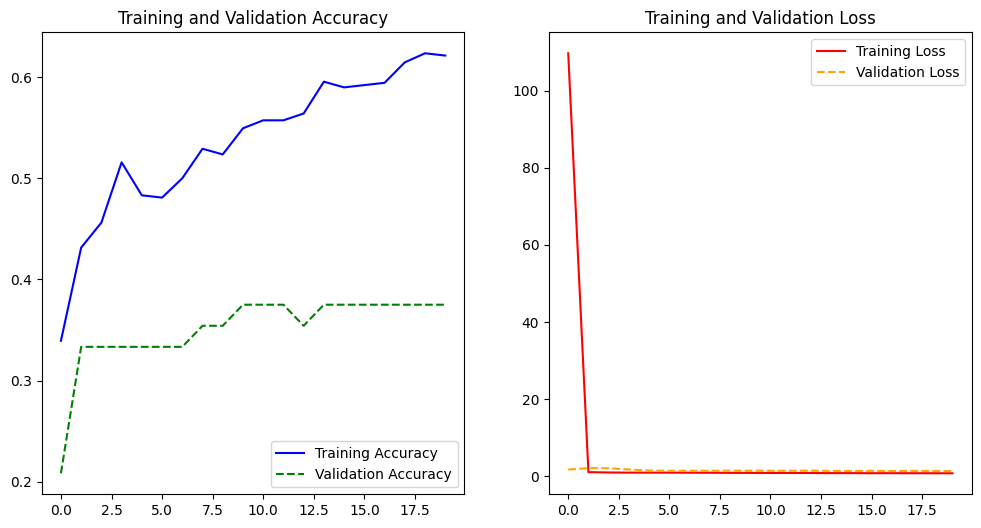

In [23]:
# To retrieve accuracy and loss history:
acc = history.history['accuracy']
print(history.history.keys, ":")
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# To define the range of epochs:
epochs_range = range(epochs)

# To plot Training and Validation Accuracy:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)

# To plot Training Accuracy:
plt.plot(epochs_range, acc, label='Training Accuracy', color='blue', linestyle='-')

# To plot Validation Accuracy:
plt.plot(epochs_range, val_acc, label='Validation Accuracy', color='green', linestyle='--')

# To add legend:
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# To plot Training and Validation Loss:
plt.subplot(1, 2, 2)

# To plot Training Loss:
plt.plot(epochs_range, loss, label='Training Loss', color='red', linestyle='-')

# To plot Validation Loss:
plt.plot(epochs_range, val_loss, label='Validation Loss', color='orange', linestyle='--')

# To add legend:
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# To display plot:
plt.show()


#### Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### Ans: There's a slight improvement from the previous model, with training and validation accuracies aligning better. Fit seems good, but accuracy is still low. We need more training epochs to handle class imbalances effectively.

### Find the distribution of classes in the training dataset.

### Distribution of classes:

<Figure size 1000x1000 with 0 Axes>

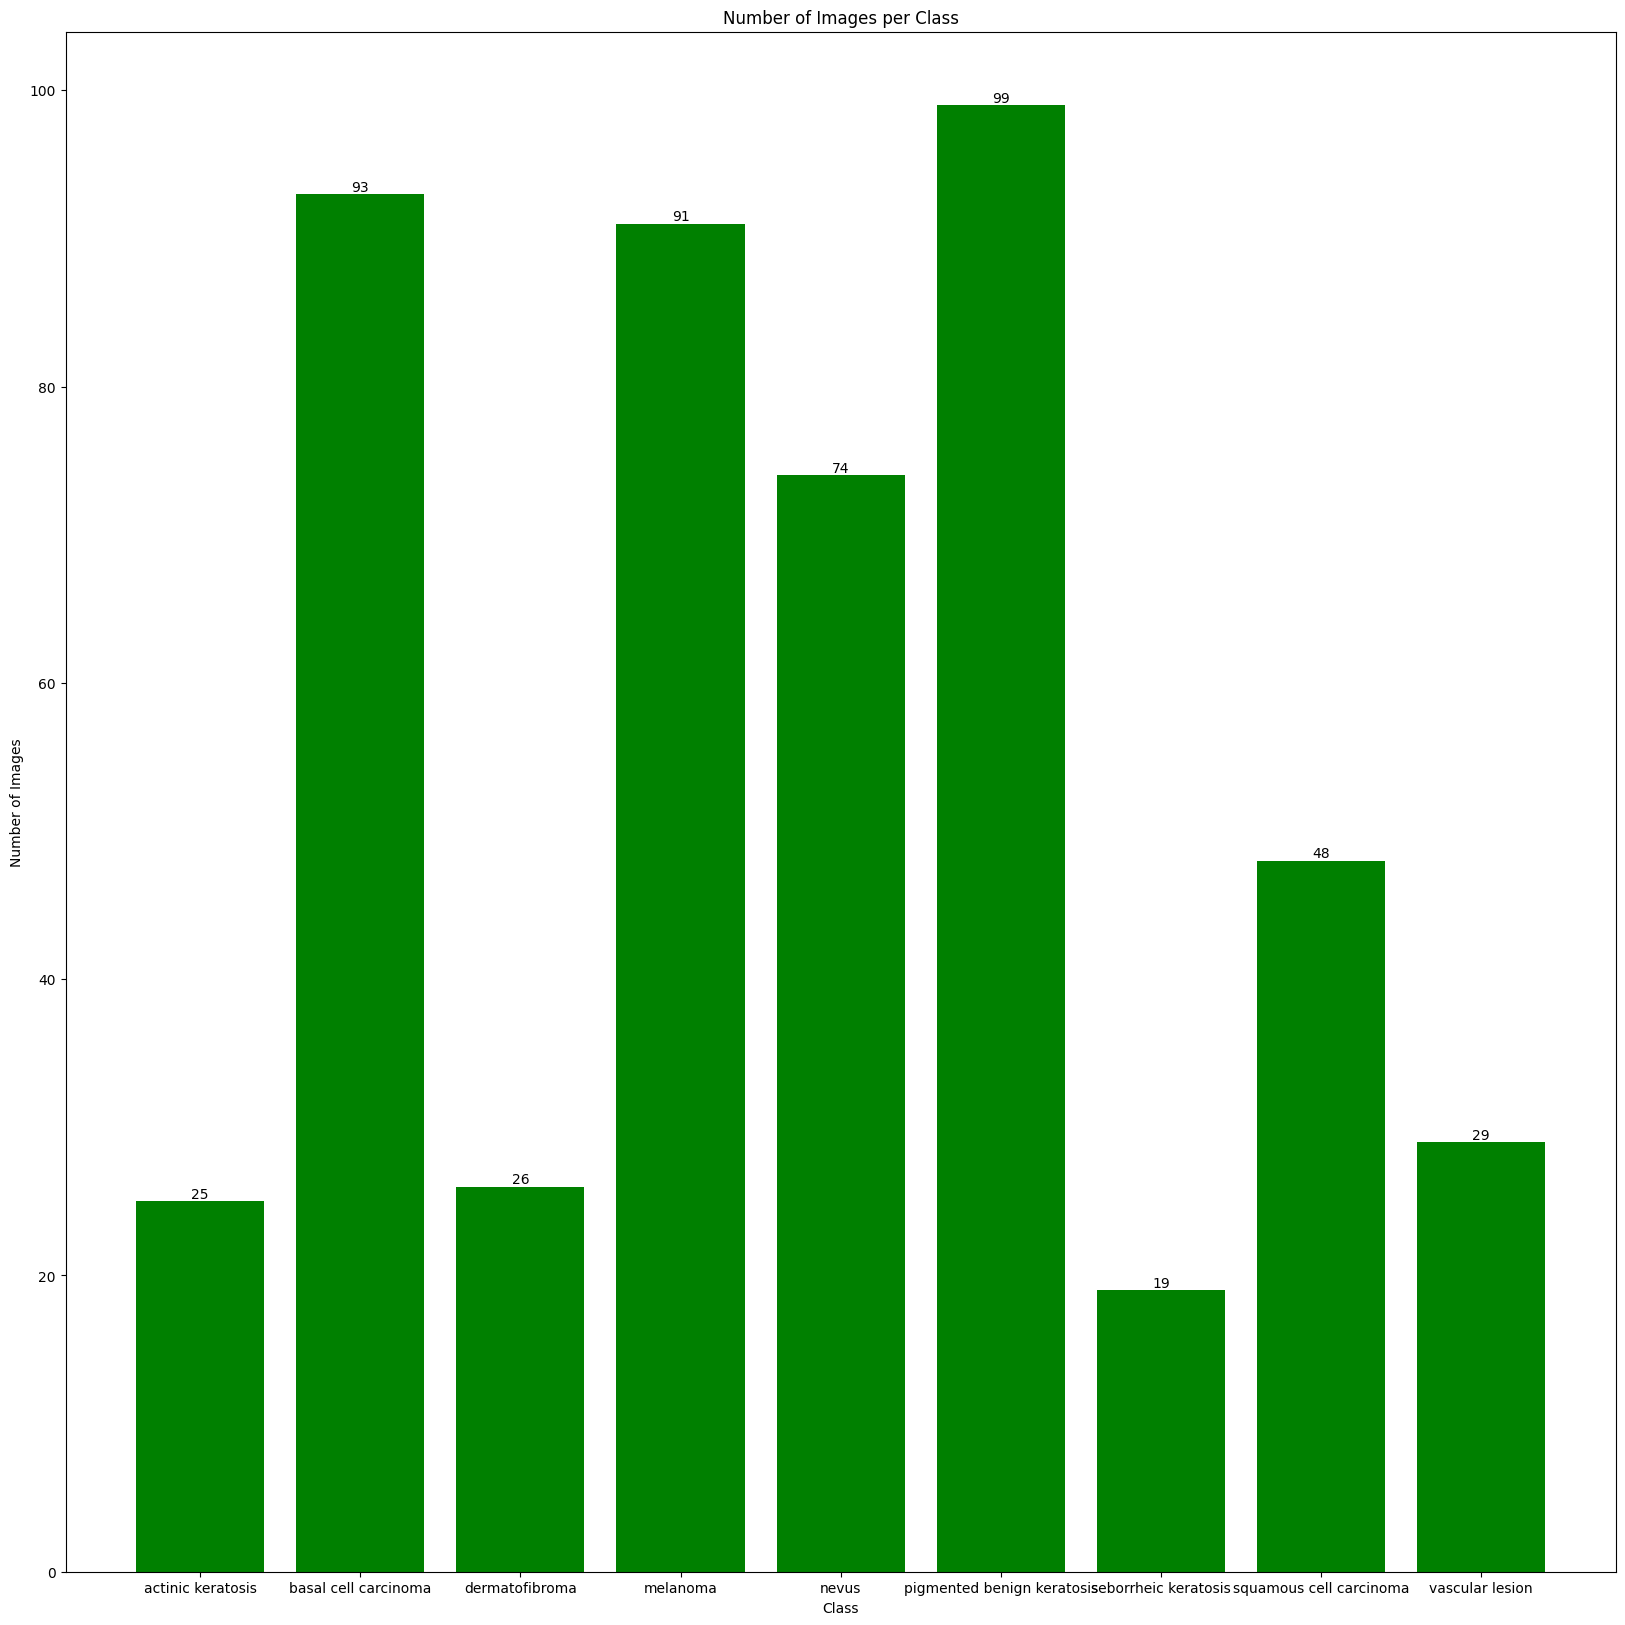

In [24]:
# To initialize data dictionary:
data = dict()

# To iterate over class names:
for i in class_names:
    data[i] = []

# To create figure:
plt.figure(figsize=(10, 10))

# To iterate over images and labels in the training dataset:
for images, labels in train_ds:
    for i in range(9):
        data[class_names[labels[i]]].append(images[i].numpy().astype("uint8"))

# To count the number of images per class:
for i in data:
    data[i] = len(data[i])

# To create a new figure with adjusted size:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(20)

# To plot the bar graph:
bars = plt.bar(range(len(data)), list(data.values()), align='center', color='green')

# To set x-axis ticks and labels:
plt.xticks(range(len(data)), list(data.keys()))

# To add data labels above each bar:
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height, '%d' % int(height), ha='center', va='bottom')

# To add title and labels:
plt.title('Number of Images per Class')
plt.xlabel('Class')
plt.ylabel('Number of Images')

# To display the plot:
plt.show()

#### Observations

- Which class has the least number of samples?

 **Ans:** Seborrheic keratosis

- Which classes dominate the data in terms proportionate number of samples?

**Ans:** The training data is primarily dominated by instances of Pigmented benign keratosis.


### Rectify the class imbalance:

#### We will use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.


In [25]:
!pip install Augmentor


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


- To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [26]:
# To set the path to the training dataset directory:
path_to_training_dataset = "Train/"

# To import libraries:
import Augmentor

# To iterate through each class in the dataset:
for class_name in class_names:
    # To initialize Augmentor pipeline for the current class:
    p = Augmentor.Pipeline(path_to_training_dataset + class_name)
    
    # To rotate images with a probability of 70%, with maximum left rotation of 10 degrees and maximum right rotation of 10 degrees:
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    
    # To generate 500 augmented samples for the current class:
    p.sample(500) 

Initialised with 114 image(s) found.
Output directory set to Train/actinic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x25546B6F380>: 100%|██████████| 500/500 [00:01<00:00, 307.77 Samples/s]                  


Initialised with 376 image(s) found.
Output directory set to Train/basal cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x25546D26540>: 100%|██████████| 500/500 [00:01<00:00, 296.68 Samples/s]                  


Initialised with 95 image(s) found.
Output directory set to Train/dermatofibroma\output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x25546D7BF20>: 100%|██████████| 500/500 [00:01<00:00, 311.96 Samples/s]


Initialised with 438 image(s) found.
Output directory set to Train/melanoma\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x25546CFBE00>: 100%|██████████| 500/500 [00:08<00:00, 62.50 Samples/s]                   


Initialised with 357 image(s) found.
Output directory set to Train/nevus\output.

Processing <PIL.Image.Image image mode=RGB size=919x802 at 0x25516CBD6A0>: 100%|██████████| 500/500 [00:07<00:00, 70.43 Samples/s]                     


Initialised with 462 image(s) found.
Output directory set to Train/pigmented benign keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x25516EDA780>: 100%|██████████| 500/500 [00:01<00:00, 306.92 Samples/s]                  


Initialised with 77 image(s) found.
Output directory set to Train/seborrheic keratosis\output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x25516C3E930>: 100%|██████████| 500/500 [00:03<00:00, 138.25 Samples/s]                  


Initialised with 181 image(s) found.
Output directory set to Train/squamous cell carcinoma\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x25574FF4CE0>: 100%|██████████| 500/500 [00:01<00:00, 284.47 Samples/s]                  


Initialised with 139 image(s) found.
Output directory set to Train/vascular lesion\output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2556E7F4650>: 100%|██████████| 500/500 [00:01<00:00, 322.81 Samples/s]                  


In [27]:
# To count the number of images in the training directory:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
# To print the total number of images in the training set:
print(image_count_train)


4500


- Lets check the distribution of augmented data after adding new images to the original training data.

In [28]:
from glob import glob
# To create a list of file paths for images in the training directory:
path_list = [x for x in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
# To display the list of file paths:
path_list

['Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_0ade53b5-7dc9-4d21-93e7-56c566d060a4.jpg',
 'Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_32fe111a-f7d2-4a47-881c-89e67dc3de48.jpg',
 'Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025780.jpg_9820e6cd-8cad-4044-a025-9b300106b1f8.jpg',
 'Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_57e4d733-ab64-4034-aa51-90383c64a284.jpg',
 'Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_9758a993-c273-4ad6-89fc-736dbacab525.jpg',
 'Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025803.jpg_ab6a6a61-09eb-4742-aa7b-309e7da62471.jpg',
 'Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025825.jpg_09dc0be7-be73-4357-abe0-8416d0515b8f.jpg',
 'Train\\actinic keratosis\\output\\actinic keratosis_original_ISIC_0025825.jpg_1d48caf1-9831-46b9-99f2-e8ee1cbf9929.jpg',
 'Train\\actinic

- Augmentor has saved the augmented images within the output sub-directory of each skin cancer type's sub-directory. Let's check the total number of augmented images.


In [29]:
# To create a list of lesion names extracted from file paths in the training directory:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
# To display the list of lesion names:
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [30]:
# To create a dictionary mapping image paths to lesion names:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [31]:
# To create a DataFrame from the dictionary with columns 'Path' and 'Label':
df2 = pd.DataFrame(list(dataframe_dict_new.items()), columns=['Path', 'Label'])
# To create a new DataFrame for further processing:
new_df = df2

In [32]:
# To count the occurrences of each label in the 'Label' column of the DataFrame:
new_df['Label'].value_counts()

Label
actinic keratosis             500
basal cell carcinoma          500
dermatofibroma                500
melanoma                      500
nevus                         500
pigmented benign keratosis    500
seborrheic keratosis          500
squamous cell carcinoma       500
vascular lesion               500
Name: count, dtype: int64

#### Observations: Now that we've added 500 images to each class to maintain some balance among the classes, We can add more images as needed to enhance the training process further.

### Train the model on the data created using Augmentor:

In [33]:
# To define batch size for training:
batch_size = 32
# To define image height and width for resizing:
img_height = 180
img_width = 180

### Create a training dataset

In [34]:
# To define the directory for training data:
data_dir_train = "Train"

# To create a dataset for training from the directory:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split=0.2,
    subset='training',
    image_size=(img_height, img_width),  # Using the previously defined image dimensions:
    batch_size=batch_size
)


Found 6739 files belonging to 9 classes.
Using 5392 files for training.


### Create a validation dataset

In [35]:
# To create a dataset for validation from the directory:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split=0.2,
    subset='validation',
    image_size=(img_height, img_width),  # Using the previously defined image dimensions:
    batch_size=batch_size
)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


### Create the model:

In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, Dense

# To initialize a sequential model:
model = Sequential()

# To add two convolutional layers with 32 filters, each with a kernel size of 3x3 and ReLU activation:
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=input_shape))
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'))

# To add a max pooling layer with a pool size of 2x2:
model.add(MaxPool2D(pool_size=(2, 2)))

# Batch normalization for normalization between layers:
model.add(BatchNormalization())

# To add dropout:
model.add(Dropout(0.25))

# To add two convolutional layers with 64 filters, each with a kernel size of 3x3 and ReLU activation:
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'))

# To add a max pooling layer with a pool size of 2x2:
model.add(MaxPool2D(pool_size=(2, 2)))

# Batch normalization for normalization between layers:
model.add(BatchNormalization())

# To add dropout:
model.add(Dropout(0.4))

# To add a convolutional layer with 128 filters and a kernel size of 3x3 with ReLU activation:
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

# Batch normalization for normalization between layers:
model.add(BatchNormalization())

# To add a max pooling layer with a pool size of 2x2:
model.add(MaxPool2D(pool_size=(2, 2)))

# To add dropout:
model.add(Dropout(0.4))

# Flatten the output from the convolutional layers:
model.add(Flatten())

# To add a fully connected layer with 128 neurons and ReLU activation:
model.add(Dense(128, activation='relu'))

# Batch normalization for normalization between layers:
model.add(BatchNormalization())

# To add dropout:
model.add(Dropout(0.5))

# To add a fully connected output layer with softmax activation:
model.add(Dense(1, activation='softmax'))

# To print model summary
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 180, 180, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 180, 180, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 90, 90, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 90, 90, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 90, 90, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 90, 90, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 45, 45, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 43, 43, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 43, 43, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 21, 21, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 21, 21, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 56448)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     7,225,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,366,433 (28.10 MB)

 Trainable params: 7,365,729 (28.10 MB)

 Non-trainable params: 704 (2.75 KB)

### Compile model:
- Choosing appropriate optimizer and loss function 

In [37]:
from tensorflow.keras.optimizers import Adam

# To define the optimizer with specific parameters:
optimizer = Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0, amsgrad=False)

# To compile the model with categorical crossentropy loss, the defined optimizer, and accuracy metrics:
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])


### Train  model:

In [38]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# To define the number of epochs:
epochs = 50

# To define a learning rate reduction callback:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

# To define the batch size:
batch_size = 10

# To train the model with defined parameters and callbacks:
history = model.fit(train_ds,
                    epochs=epochs,
                    verbose=1,
                    validation_data=val_ds,
                    callbacks=[learning_rate_reduction])


Epoch 1/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 124s 721ms/step - accuracy: 0.1356 - loss: 0.0000e+00 - val_accuracy: 0.1151 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 2/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 121s 714ms/step - accuracy: 0.1366 - loss: 0.0000e+00 - val_accuracy: 0.1151 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 3/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 119s 705ms/step - accuracy: 0.1378 - loss: 0.0000e+00 - val_accuracy: 0.1151 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 4/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 0s 659ms/step - accuracy: 0.1394 - loss: 0.0000e+00
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
169/169 ━━━━━━━━━━━━━━━━━━━━ 118s 697ms/step - accuracy: 0.1393 - loss: 0.0000e+00 - val_accuracy: 0.1151 - val_loss: 0.0000e+00 - learning_rate: 0.0010
Epoch 5/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 118s 696ms/step - accuracy: 0.1366 - loss: 0.0000e+00 - val_accuracy: 0.1151 - val_loss: 0.0000e+00 - learning_rate: 5.0000e-04
Epoch 6/50
169/169 

### Visualize the model results:

In [ ]:
# To extract accuracy and loss values from training history:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# To generate range for epochs:
epochs_range = range(epochs)

# To plot Training and Validation Accuracy:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)

# To plot Training Accuracy:
plt.plot(epochs_range, acc, label='Training Accuracy', color='blue')

# To plot Validation Accuracy:
plt.plot(epochs_range, val_acc, label='Validation Accuracy', color='orange')

# To add legend and title:
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

# To plot Training and Validation Loss:
plt.subplot(1, 2, 2)

# To plot Training Loss:
plt.plot(epochs_range, loss, label='Training Loss', color='blue')

# To plot Validation Loss:
plt.plot(epochs_range, val_loss, label='Validation Loss', color='orange')

# To add legend and title:
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# To display the plot:
plt.show()


#### Did you get rid of underfitting/overfitting? Did class rebalance help?

- Balancing the classes helped to prevent overfitting, which lowered the loss. However, it also caused a significant drop in accuracy.

- Initially, we attempted training without using ImageDataGenerator, which led to overfitting due to the imbalance in data distribution.

- Then we implemented dropout and ImageDataGenerator, leading to a decrease in overfitting.

- Finally, we implemented Batch Normalization and Augmentation, which proved to be beneficial for our project.

### Technologies Used:
- Python, version 3 
- NumPy for numerical computations
- Matplotlib and seaborn for data visualization
- Pandas for data manipulation
- Statsmodels for statistical modeling
- Sklearn for machine learning tasks
- Tensorflow, keras, augmentor for deep learning 
- Jupyter Notebook for interactive analysis

### References:
- Python documentations
- Tensorflow, keras, augmentor documentations
- Stack Overflow

### Contact Information:
Created by https://github.com/Erkhanal - feel free to contact!
#### *Msc, ML&AI*